<style>
img
{
    display:block; 
    float:none; 
    margin-left:auto;
    margin-right:auto;
    width:80%;
}
</style> 

___

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [4]:

df = pd.read_csv('train-final-3.csv')

___

<a id = "6" ></a>
# <span style="font-family:serif; font-size:28px;"> 3. Undertanding the data</span>
<a id = "Undertanding the data" ></a>

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [25]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**The data set includes information about:**
* **Customers who left within the last month** – the column is called Churn

* **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* **Customer account information** - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* **Demographic info about customers** – gender, age range, and if they have partners and dependents

In [26]:
df.shape

(7043, 19)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [28]:
df.columns.values

array(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'], dtype=object)

In [29]:
df.dtypes

SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


* The target the we will use to guide the exploration is **Churn**

***

<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> 4. Visualize missing values </span>
<a id = "missingvalue" ></a>

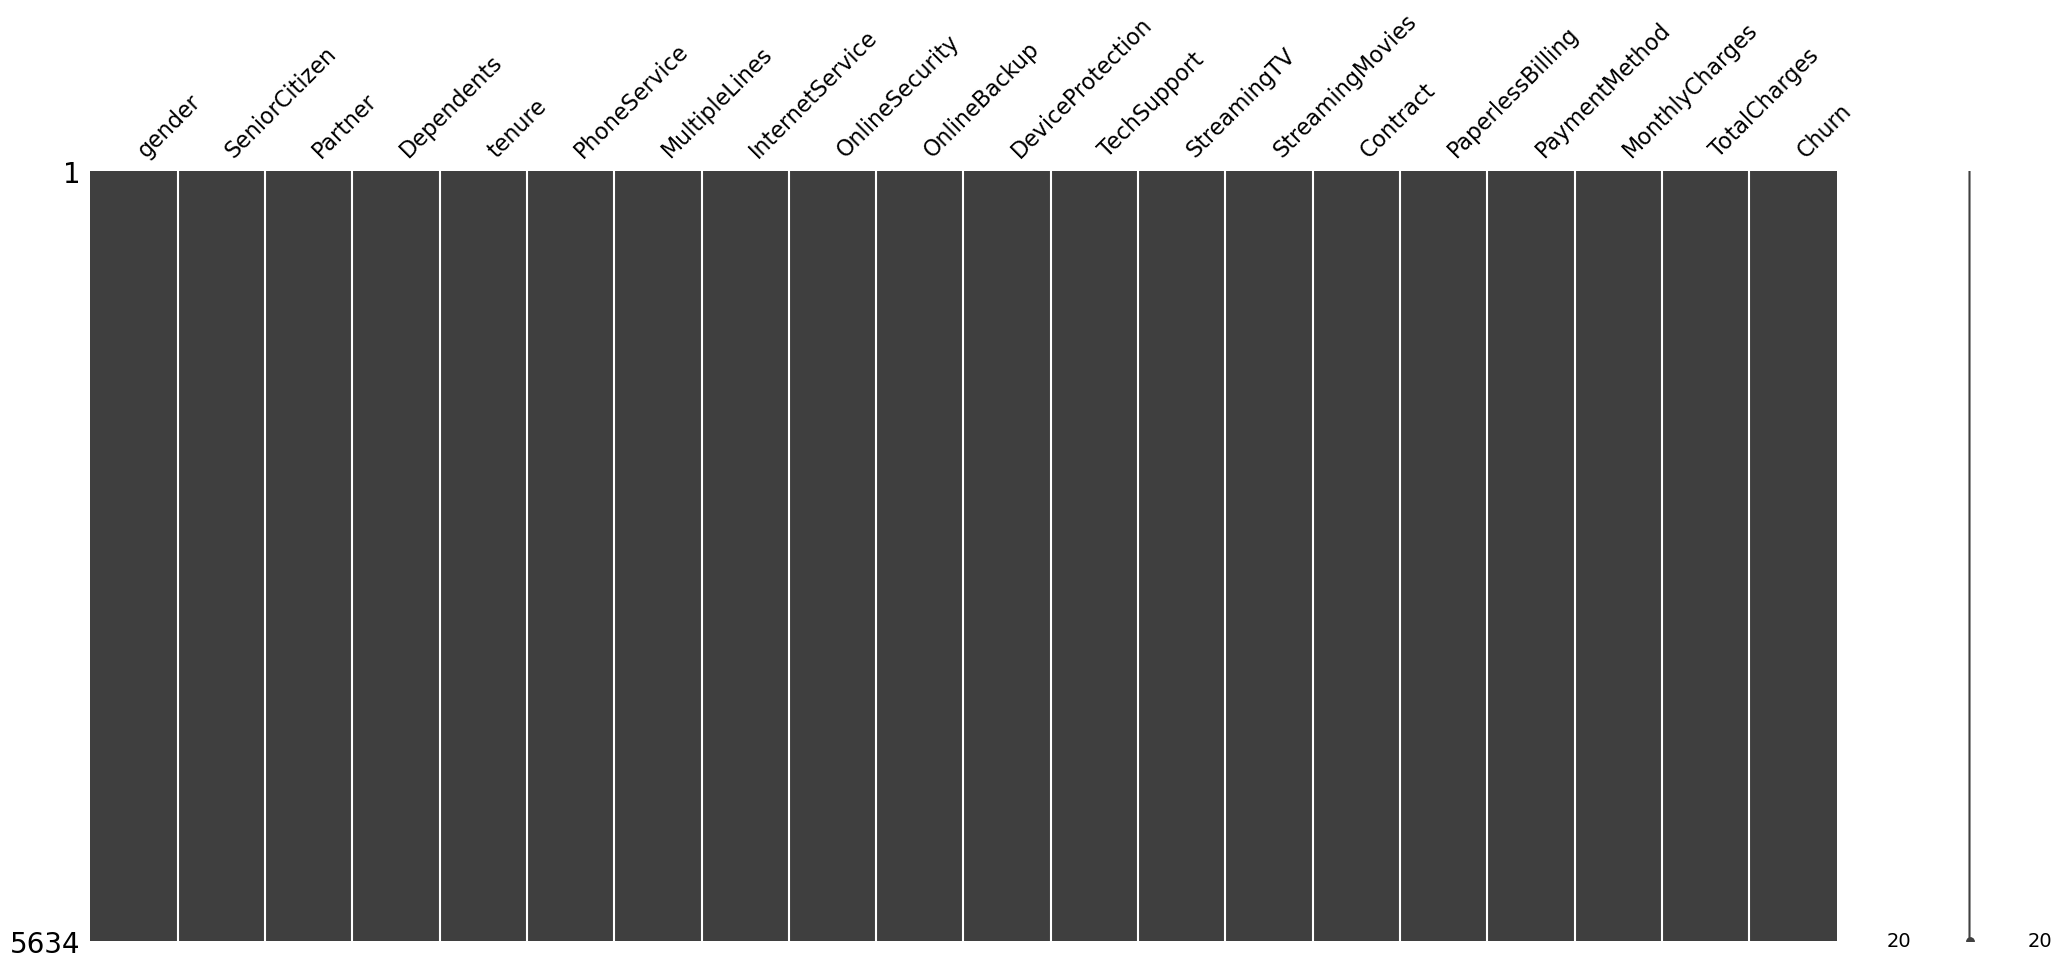

In [59]:
# Visualize missing values as a matrix
msno.matrix(df);

> Using this matrix we can very quickly find the pattern of missingness in the dataset. 
* From the above visualisation we can observe that it has no peculiar pattern that stands out. In fact there is no missing data.

***

<a id = "8" ></a>
# <span style="font-family:serif; font-size:28px;"> 5. Data Manipulation </span>
<a id = "8" ></a>

In [60]:
df = df.drop(['Contract'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,35,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,No,Electronic check,49.20,1701.65,No
1,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,No,No,No,No,No,No,Mailed check,75.10,1151.55,No
2,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,No,Mailed check,40.55,590.35,No
3,Female,0,Yes,No,26,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,Yes,Credit card (automatic),73.50,1905.7,No
4,Male,0,Yes,Yes,1,Yes,No,DSL,No,No,No,No,No,No,No,Electronic check,44.55,44.55,No


* On deep analysis, we can find some indirect missingness in our data (which can be in form of blankspaces). Let's see that!

In [61]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

* Here we see that the TotalCharges has 11 missing values. Let's check this data.

In [18]:
df[np.isnan(df['TotalCharges'])]

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


* It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.

Let's see if there are any other 0 values in the tenure column.

In [62]:
df[df['tenure'] == 0].index

Index([819, 1999, 2100, 4710, 5057, 5294, 5361, 5608], dtype='int64')

* There are no additional missing values in the Tenure column. 

Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [63]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

> To solve the problem of missing values in TotalCharges column, I decided to fill it with the mean of TotalCharges values.

In [64]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,35,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,No,Electronic check,49.20,1701.65,No
1,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,No,No,No,No,No,No,Mailed check,75.10,1151.55,No
2,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,No,Mailed check,40.55,590.35,No
3,Female,0,Yes,No,26,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,Yes,Credit card (automatic),73.50,1905.70,No
4,Male,0,Yes,Yes,1,Yes,No,DSL,No,No,No,No,No,No,No,Electronic check,44.55,44.55,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,Female,0,Yes,No,71,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,No,Electronic check,109.25,7707.70,No
5630,Male,0,No,No,2,Yes,No,DSL,No,No,No,No,No,No,No,Bank transfer (automatic),46.05,80.35,Yes
5631,Female,1,No,No,25,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,Yes,Yes,Mailed check,102.80,2660.20,Yes
5632,Female,0,Yes,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,Credit card (automatic),20.40,482.80,No


In [22]:
df.isnull().sum()

id                  0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,No,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,No,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,No,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,No,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,No,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [28]:
df["InternetService"].describe(include=['object', 'bool'])

count    7043.000000
mean        0.872923
std         0.737796
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: InternetService, dtype: float64

In [29]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,3257.794122
std,24.559481,30.090047,1888.693496
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,1609.000000
50%,29.000000,70.350000,3249.000000
75%,55.000000,89.850000,4901.500000
max,72.000000,118.750000,6530.000000


___

<a id = "9" ></a>
# <span style="font-family:serif; font-size:28px;"> 6. Data Visualization </span>
<a id = "datavisualization" ></a>

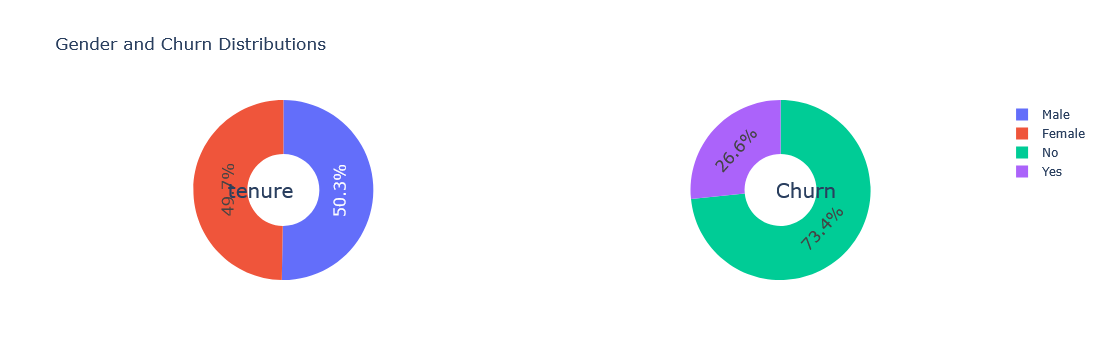

In [67]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='tenure', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

* 26.6 % of customers switched to another firm.
* Customers are 49.5 % female and 50.5 % male.

In [68]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2051
Male      2080
Name: Churn, dtype: int64

In [69]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    746
Male      749
Name: Churn, dtype: int64

* There is negligible difference in customer percentage/ count who chnaged the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

In [30]:
print(df.columns.tolist())


['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [26]:
fig = px.histogram(df, x="Churn", color="tenure", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

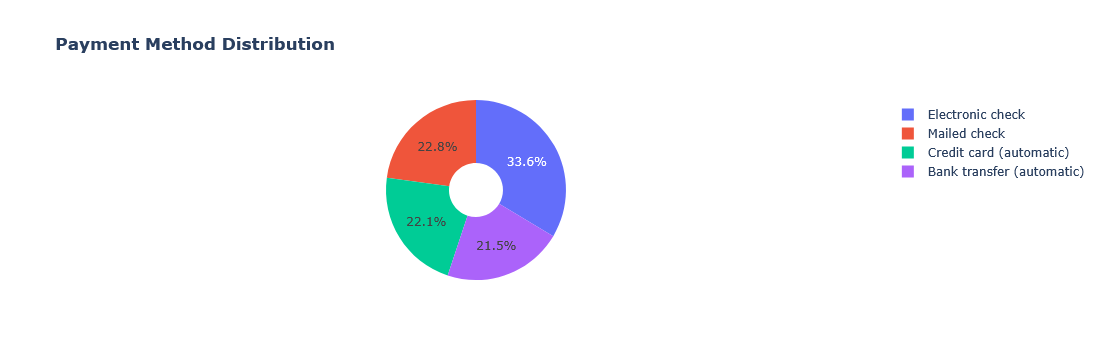

In [78]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

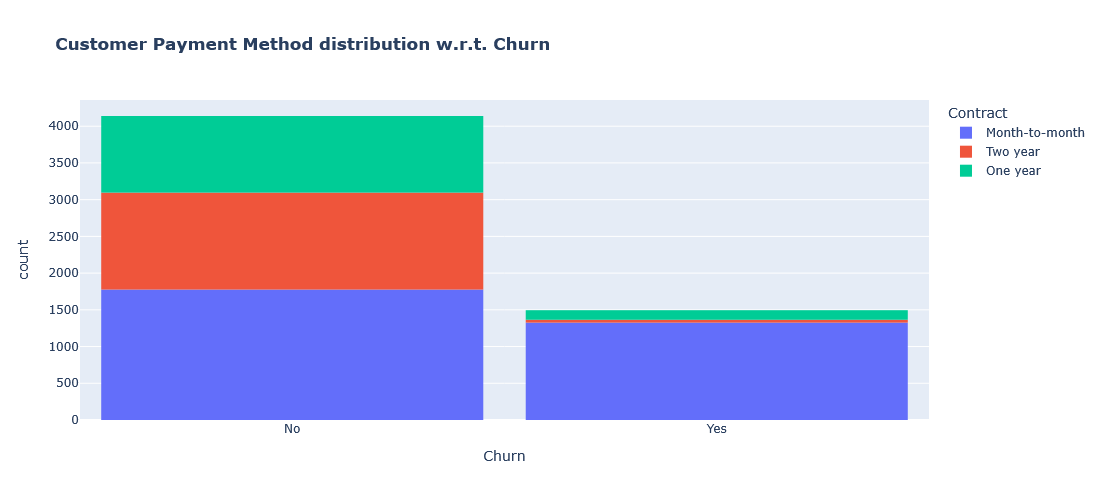

In [79]:
fig = px.histogram(df, x="Churn", color="Contract", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Major customers who moved out were having Electronic Check as Payment Method.
* Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.  

In [80]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [81]:
 df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       788
Fiber optic      No       714
No               No       582
Fiber optic      Yes      513
DSL              Yes      193
No               Yes       43
Name: count, dtype: int64

In [82]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       787
Fiber optic      No       724
No               No       544
Fiber optic      Yes      532
DSL              Yes      169
No               Yes       45
Name: count, dtype: int64

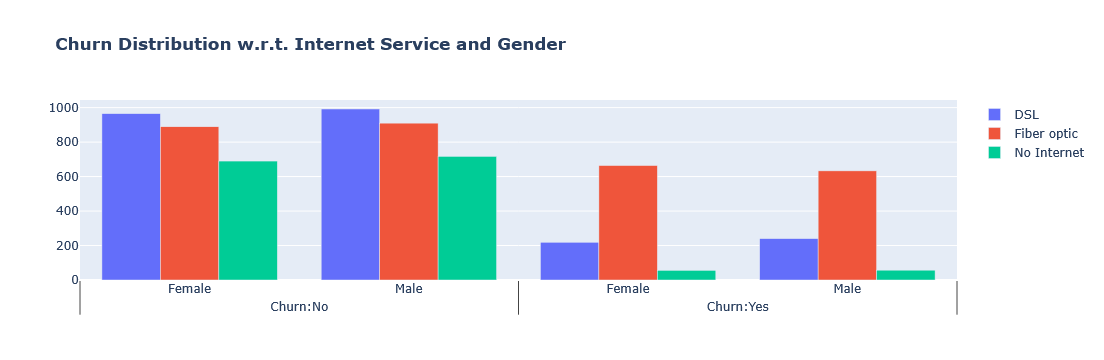

In [83]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

* A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
* Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

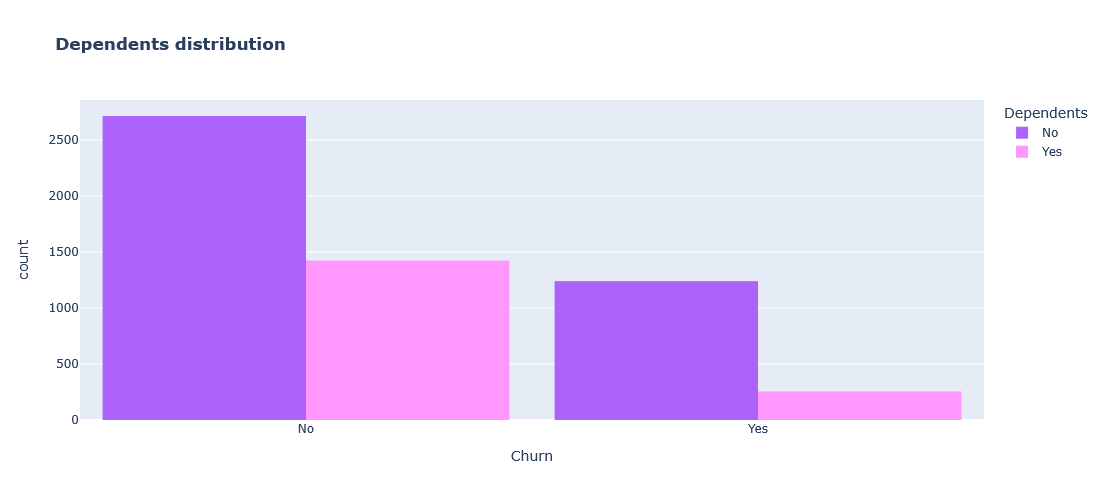

In [84]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers without dependents are more likely to churn

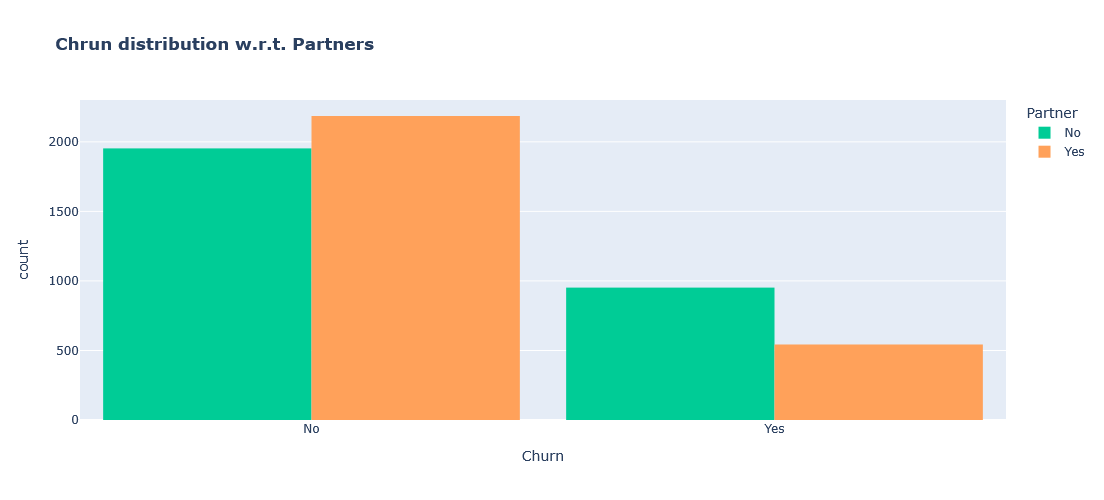

In [85]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers that doesn't have partners are more likely to churn

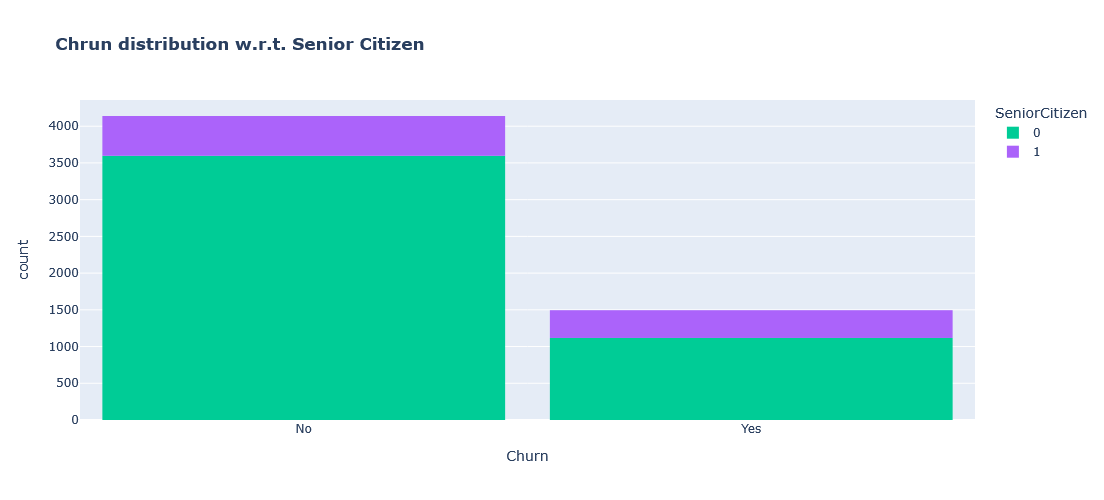

In [86]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* It can be observed that the fraction of senior citizen is very less.
* Most of the senior citizens churn.

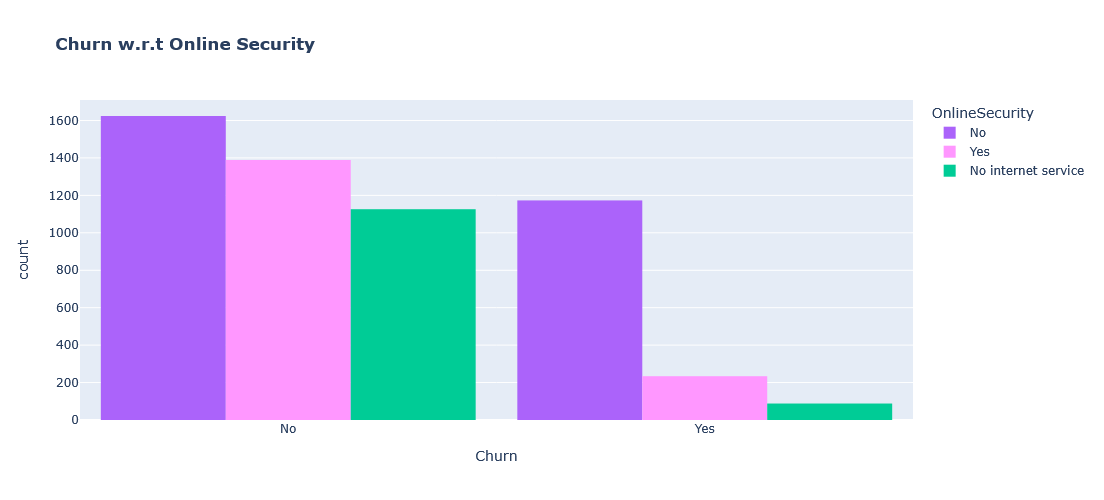

In [87]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Most customers churn in the absence of online security, 

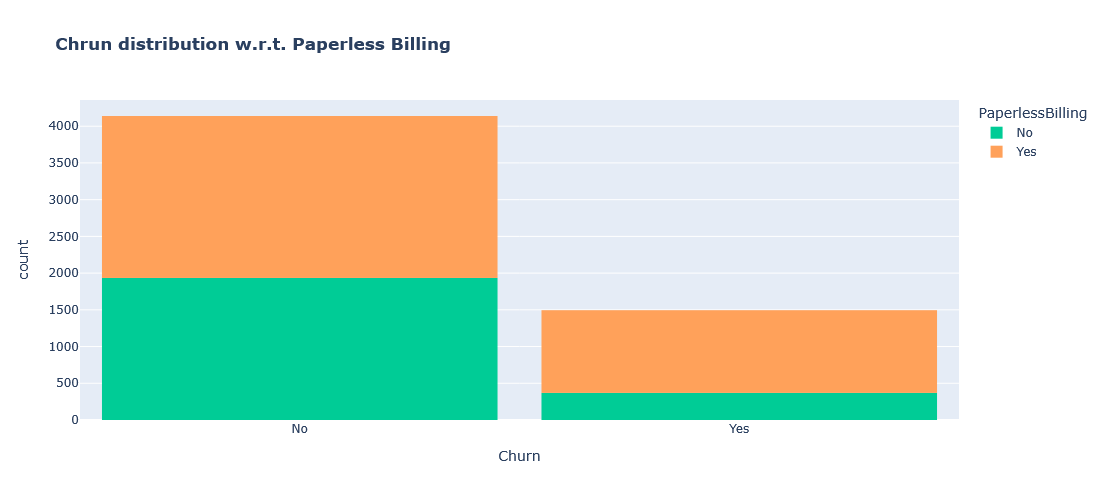

In [88]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers with Paperless Billing are most likely to churn.

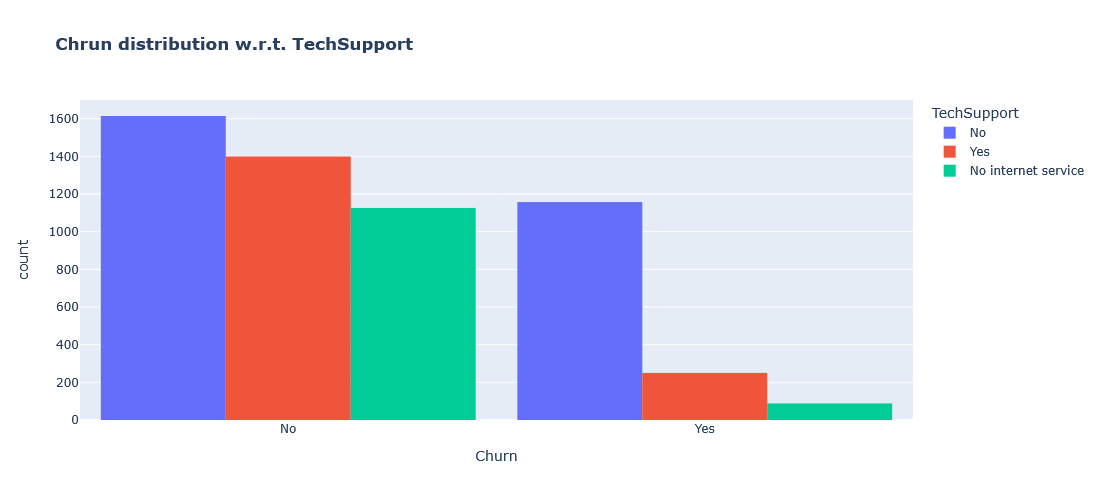

In [89]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers with no TechSupport are most likely to migrate to another service provider.

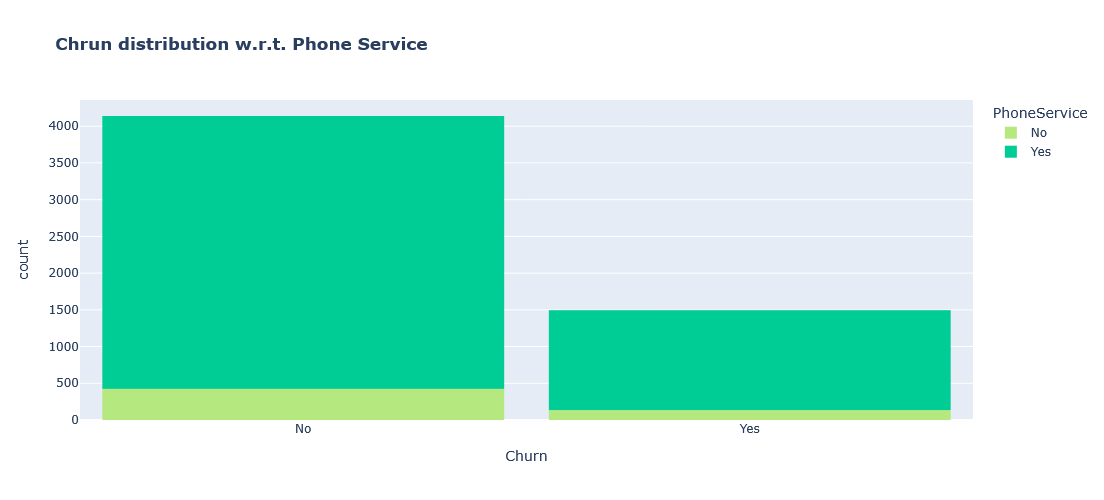

In [90]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.

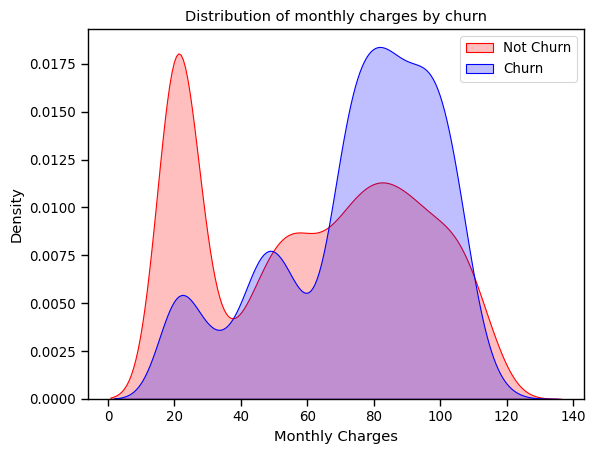

In [91]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');


* Customers with higher Monthly Charges are also more likely to churn

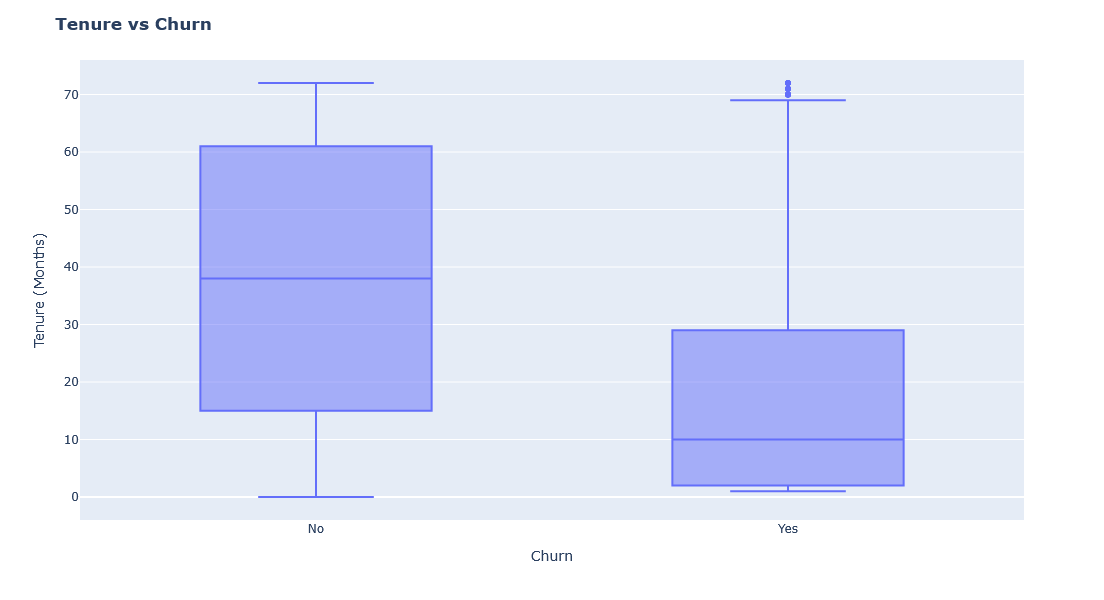

In [94]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()


* New customers are more likely to churn

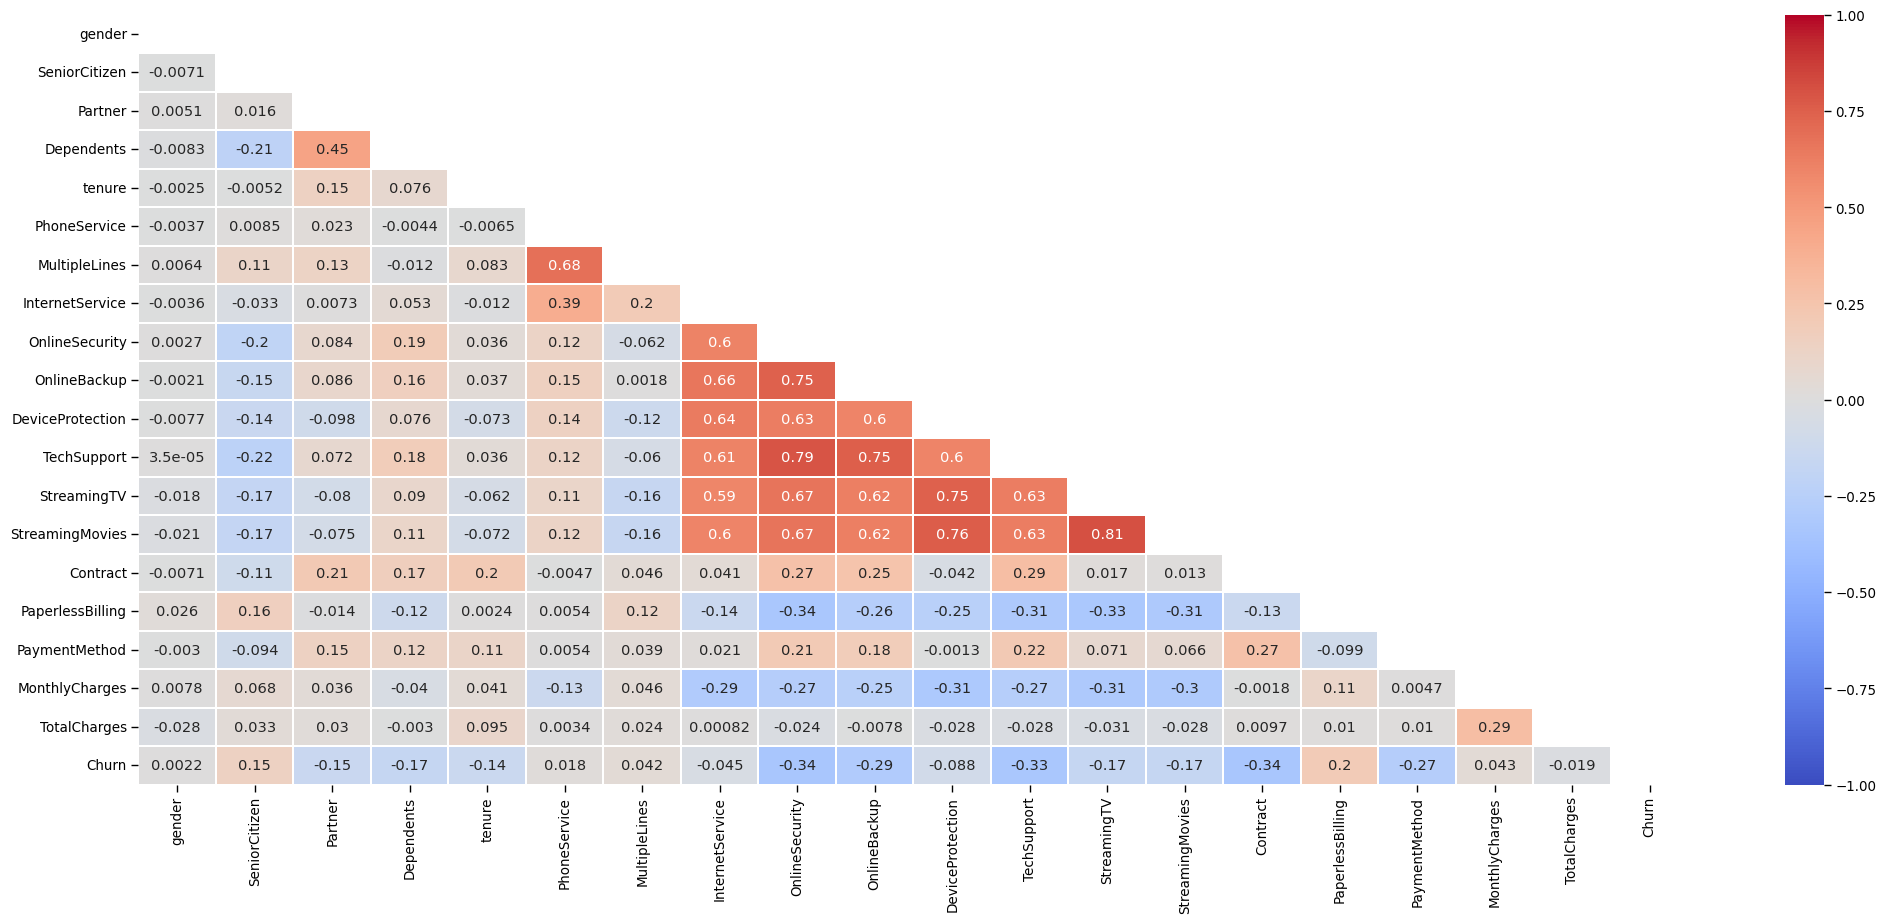

In [95]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

___

<a id = "10" ></a>
# <span style="font-family:serif; font-size:28px;"> 7. Data Preprocessing</span>
<a id = "datapreprocessing" ></a>

<a id = "1111" ></a>
#### **Splitting the data into train and test sets**
<a id = "Split" ></a>

In [38]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [39]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [40]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [41]:
X = df.drop(columns=['Churn'])
y = df['Churn']  # keep as Series


In [42]:
from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42
)

print("Before SMOTE:\n", y.value_counts())
print("\nAfter SMOTE:\n", y_res.value_counts())



Before SMOTE:
 Churn
0    5174
1    1869
Name: count, dtype: int64

After SMOTE:
 Churn
0    5174
1    5174
Name: count, dtype: int64


In [43]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

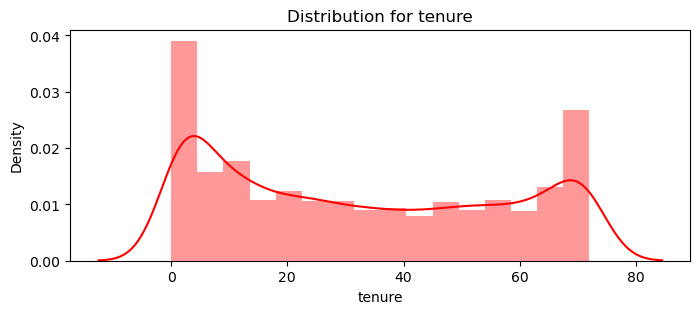

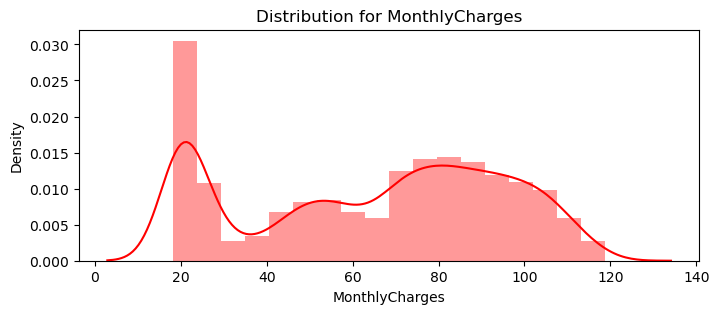

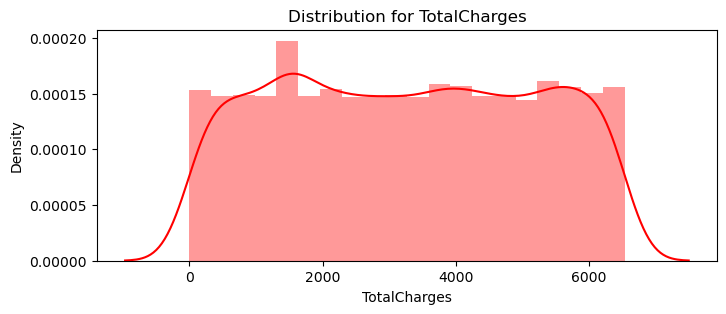

In [11]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

<a id = "111" ></a>
#### **Standardizing numeric attributes**
<a id = "Standardizing" ></a>

In [38]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

NameError: name 'numerical_cols' is not defined

In [33]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [34]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

<a id = "11" ></a>
# <span style="font-family:serif; font-size:28px;"> 8. Machine Learning Model Evaluations and Predictions</span>
<a id = "modelprediction" ></a>

<a id = "102" ></a>
#### <b>SVC</b>
<a id = "svc" ></a>

In [32]:
import optuna
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score
import numpy as np
import time

print("✅ Starting Optuna fine-tuning for SVM")

# Use a stable subset for tuning to avoid recomputing full CV
X_tune, X_hold, y_tune, y_hold = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Objective function for Optuna
def objective(trial):
    # Define SVM hyperparameters to explore
    C = trial.suggest_float("C", 0.1, 10.0, log=True)
    kernel = trial.suggest_categorical("kernel", ["linear", "rbf", "poly", "sigmoid"])
    gamma = trial.suggest_categorical("gamma", ["scale", "auto"])
    degree = trial.suggest_int("degree", 2, 5) if kernel == "poly" else 3

    svc = SVC(
        C=C,
        kernel=kernel,
        gamma=gamma,
        degree=degree,
        probability=True,  # for soft voting or ROC later
        random_state=42
    )

    # Weighted F1 score + accuracy blend
    f1 = cross_val_score(svc, X_tune, y_tune, scoring="f1_weighted", cv=3, n_jobs=-1, error_score="raise").mean()
    acc = cross_val_score(svc, X_tune, y_tune, scoring="accuracy", cv=3, n_jobs=-1, error_score="raise").mean()
    return 0.7 * f1 + 0.3 * acc

# Create and optimize Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30, show_progress_bar=True)

# Display best hyperparameters
print("\n✅ Best Hyperparameters (SVM):")
print(study.best_params)

# Train best SVM with optimized parameters
best_params = study.best_params
best_svm = SVC(
    C=best_params["C"],
    kernel=best_params["kernel"],
    gamma=best_params["gamma"],
    degree=best_params["degree"] if "degree" in best_params else 3,
    probability=True,
    random_state=42
)

start = time.time()
best_svm.fit(X_train, y_train)
train_time = time.time() - start

# Evaluate on test set
y_pred = best_svm.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")
acc = accuracy_score(y_test, y_pred)

print("\n🎯 Final SVM Results")
print(f"⏱️ Training Time: {train_time:.2f}s")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")


✅ Starting Optuna fine-tuning for SVM


[I 2025-11-12 15:54:06,801] A new study created in memory with name: no-name-210a5ecc-cbc4-4d61-bebc-0c438330d1de


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-11-12 15:54:47,178] Trial 0 finished with value: 0.530204976989337 and parameters: {'C': 1.5974450527294746, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 0 with value: 0.530204976989337.
[I 2025-11-12 15:55:12,952] Trial 1 finished with value: 0.4930829190558308 and parameters: {'C': 0.4956650092108701, 'kernel': 'poly', 'gamma': 'scale', 'degree': 3}. Best is trial 0 with value: 0.530204976989337.
[I 2025-11-12 15:55:36,983] Trial 2 finished with value: 0.49094656327983927 and parameters: {'C': 0.10182767732495683, 'kernel': 'sigmoid', 'gamma': 'scale'}. Best is trial 0 with value: 0.530204976989337.
[I 2025-11-12 15:55:52,255] Trial 3 finished with value: 0.3851247853786104 and parameters: {'C': 0.18822755234833813, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 0 with value: 0.530204976989337.
[W 2025-11-12 16:03:03,615] Trial 4 failed with parameters: {'C': 3.4134138477026417, 'kernel': 'poly', 'gamma': 'auto', 'degree': 2} because of the following error: Keyboar

KeyboardInterrupt: 

In [143]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113



<a id = "103" ></a>
#### <b> Random Forest</b>
<a id = "rf" ></a>

In [12]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import time

print("🔧 Starting Enhanced Random Forest Tuning...")

# Split for robust validation
X_tune, X_hold, y_tune, y_hold = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Define 5-fold stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 1200),
        "max_depth": trial.suggest_int("max_depth", 8, 35),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True]),  # more stable generalization
        "class_weight": "balanced_subsample",
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"]),
    }

    rf = RandomForestClassifier(**params, random_state=42, n_jobs=-1)

    # Cross-validation with F1-weighted for imbalance
    f1 = cross_val_score(rf, X_tune, y_tune, scoring="f1_weighted", cv=cv, n_jobs=-1).mean()
    acc = cross_val_score(rf, X_tune, y_tune, scoring="accuracy", cv=cv, n_jobs=-1).mean()

    # Hybrid scoring (more weight on F1)
    score = 0.7 * f1 + 0.3 * acc
    trial.report(score, step=1)

    # Prune unpromising trials
    if trial.should_prune():
        raise optuna.TrialPruned()

    return score

# Enable early stopping of poor configurations
pruner = optuna.pruners.MedianPruner(n_startup_trials=10, n_warmup_steps=1)
study = optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(objective, n_trials=40, show_progress_bar=True)

print("\n✅ Best RF Hyperparameters:")
print(study.best_params)

# Retrain using optimal configuration
best_params = study.best_params
best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)

start = time.time()
best_rf.fit(X_train, y_train)
print(f"⏱️ Training Time: {time.time() - start:.2f}s")

# Evaluate on real test data
y_pred = best_rf.predict(X_test)
print("\n🎯 Final Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))


[I 2025-11-12 14:45:47,504] A new study created in memory with name: no-name-c22ac43e-930b-43b8-9173-dad925799743


🔧 Starting Enhanced Random Forest Tuning...


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-11-12 14:46:18,448] Trial 0 finished with value: 0.8383773838988511 and parameters: {'n_estimators': 623, 'max_depth': 18, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 0 with value: 0.8383773838988511.
[I 2025-11-12 14:46:42,242] Trial 1 finished with value: 0.8411013233656564 and parameters: {'n_estimators': 744, 'max_depth': 22, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'gini'}. Best is trial 1 with value: 0.8411013233656564.
[I 2025-11-12 14:46:47,751] Trial 2 finished with value: 0.8316427747037411 and parameters: {'n_estimators': 347, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 1 with value: 0.8411013233656564.
[I 2025-11-12 14:46:55,992] Trial 3 finished with value: 0.8328647239113962 and parameters: {'n_estimators': 519, 'max_depth'

In [ ]:
print(classification_report(y_test, prediction_test))


📊 Random Forest Model Evaluation
Accuracy: 0.8623
F1 Score: 0.8623

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1021
           1       0.86      0.87      0.87      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



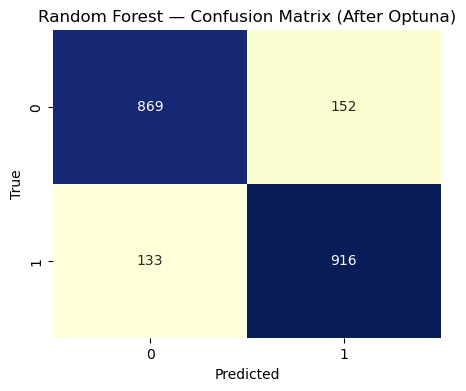

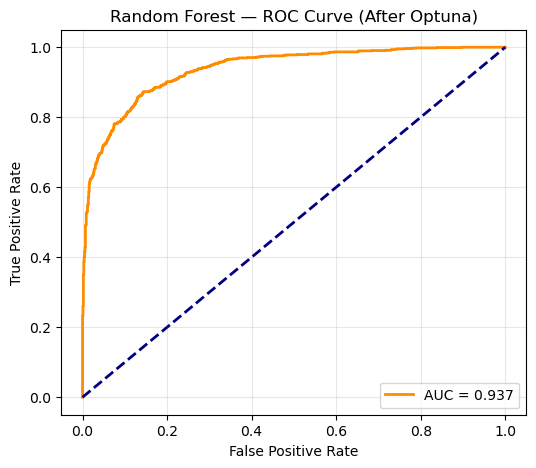

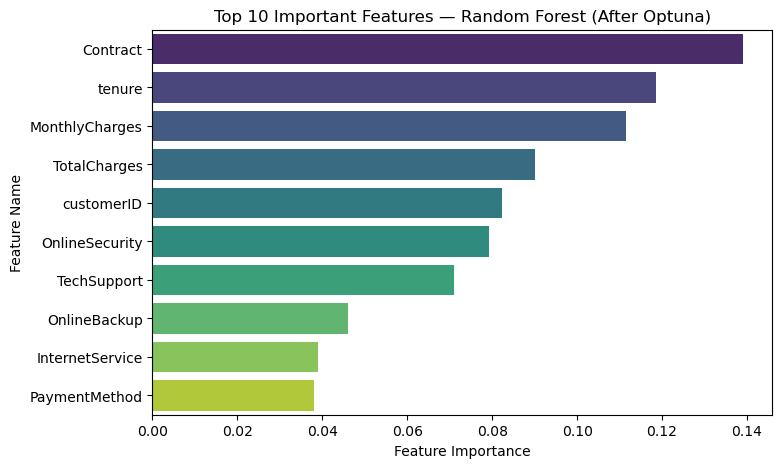

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
)
import pandas as pd

# ---- Optional: Compare Before vs After (if you have baseline RF) ----
try:
    y_pred_before = rf_model.predict(X_test)  # baseline model
    acc_before = accuracy_score(y_test, y_pred_before)
    f1_before = f1_score(y_test, y_pred_before, average='weighted')
except:
    y_pred_before = None
    acc_before, f1_before = 0, 0  # skip if no baseline model

# ---- After Optuna ----
acc_after = accuracy_score(y_test, y_pred)
f1_after = f1_score(y_test, y_pred, average="weighted")

print(f"\n📊 Random Forest Model Evaluation")
print(f"Accuracy: {acc_after:.4f}")
print(f"F1 Score: {f1_after:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ---- Confusion Matrix ----
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Random Forest — Confusion Matrix (After Optuna)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ---- ROC Curve ----
if hasattr(best_rf, "predict_proba"):
    y_proba = best_rf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.title("Random Forest — ROC Curve (After Optuna)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

# ---- Before vs After Comparison ----
if y_pred_before is not None:
    metrics_df = pd.DataFrame({
        "Metric": ["Accuracy", "F1 Score"],
        "Before Tuning": [acc_before, f1_before],
        "After Tuning": [acc_after, f1_after]
    })

    metrics_df.plot(
        x="Metric",
        kind="bar",
        figsize=(6,4),
        title="Random Forest — Before vs After Optuna",
        rot=0,
        color=["gray", "green"]
    )
    plt.legend(["Before", "After"], loc="lower right")
    plt.show()

# ---- Feature Importance ----
importances = best_rf.feature_importances_
feat_names = X_train.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
sns.barplot(x=importances[sorted_idx][:10], y=feat_names[sorted_idx][:10], palette="viridis")
plt.title("Top 10 Important Features — Random Forest (After Optuna)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.show()


<a id = "104" ></a>
#### <b>Logistic Regression</b>
<a id = "lr" ></a>

In [43]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8130434782608695


In [147]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1552
           1       0.63      0.56      0.59       561

    accuracy                           0.79      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.79      0.79      2113



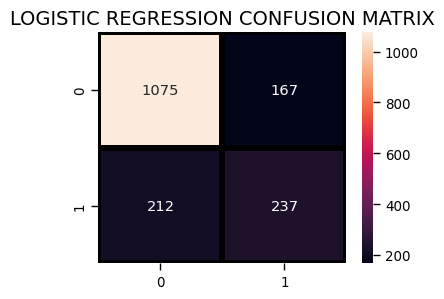

In [116]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

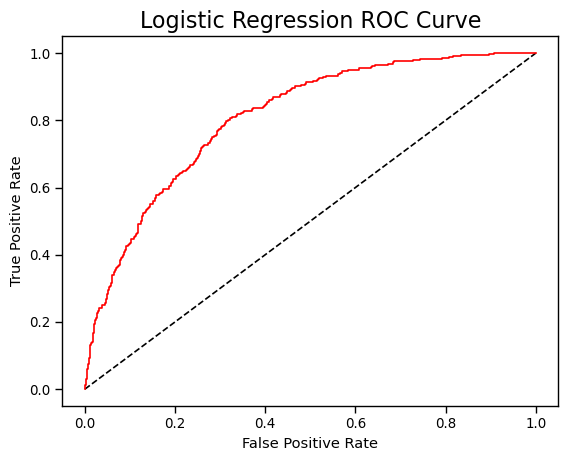

In [117]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

<a id = "105" ></a>
#### **Decision Tree Classifier**
<a id = "dtc" ></a>

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
import time

# Base model
dt = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced'
)

# Extended parameter grid for better search coverage
param_grid_dt = {
    'max_depth': [5, 10, 15, 20, None],     # more granularity for tree depth
    'min_samples_split': [2, 5, 10, 20],    # controls split sensitivity
    'min_samples_leaf': [1, 2, 4],          # avoids overfitting to small samples
    'criterion': ['gini', 'entropy', 'log_loss']  # new criterion added in sklearn 1.3+
}

# GridSearchCV setup
grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring='f1_weighted',  # better for churn imbalance
    n_jobs=-1,
    verbose=2
)

print("🚀 Starting Decision Tree grid search...")
start_time = time.time()
grid_dt.fit(X_train, y_train)
end_time = time.time()

# Best model and params
best_dt = grid_dt.best_estimator_
print(f"\n✅ Best Decision Tree Params: {grid_dt.best_params_}")
print(f"⏱️ Training time: {end_time - start_time:.2f} seconds")

# Evaluate
y_pred_dt = best_dt.predict(X_test)
print("\n🎯 Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


🚀 Starting Decision Tree grid search...
Fitting 5 folds for each of 180 candidates, totalling 900 fits

✅ Best Decision Tree Params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
⏱️ Training time: 35.58 seconds

🎯 Evaluation on Test Set:
Accuracy: 0.8173913043478261
F1 Score: 0.8170536088017312

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      1021
           1       0.80      0.86      0.83      1049

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



Decision tree gives very low score.

In [119]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1242
           1       0.48      0.52      0.50       449

    accuracy                           0.72      1691
   macro avg       0.65      0.66      0.65      1691
weighted avg       0.73      0.72      0.72      1691



<a id = "106" ></a>
#### **AdaBoost Classifier**
<a id = "ada" ></a>

In [15]:
import optuna
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, f1_score
import sklearn
import numpy as np
import time

print("✅ Scikit-learn version:", sklearn.__version__)

# check compatible algorithm
algo = "SAMME"
try:
    AdaBoostClassifier(algorithm="SAMME.R")._validate_params()
    algo = "SAMME.R"
except Exception:
    algo = "SAMME"
print(f"⚙️ Using AdaBoost algorithm = {algo}")

# stable validation split
X_tune, X_hold, y_tune, y_hold = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

def objective(trial):
    base = DecisionTreeClassifier(
        max_depth=trial.suggest_int("max_depth", 1, 6),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10),
        class_weight="balanced",
        random_state=42
    )

    ada = AdaBoostClassifier(
        estimator=base,
        n_estimators=trial.suggest_int("n_estimators", 50, 400),
        learning_rate=trial.suggest_float("learning_rate", 0.05, 0.3),
        algorithm=algo,
        random_state=42
    )

    f1 = cross_val_score(ada, X_tune, y_tune, scoring="f1_weighted", cv=3, n_jobs=-1, error_score="raise").mean()
    acc = cross_val_score(ada, X_tune, y_tune, scoring="accuracy", cv=3, n_jobs=-1, error_score="raise").mean()
    return 0.6 * f1 + 0.4 * acc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=25, show_progress_bar=True)

print("✅ Best Hyperparams:", study.best_params)

# retrain with optimal parameters
best_params = study.best_params
best_tree = DecisionTreeClassifier(
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    class_weight="balanced",
    random_state=42
)

best_ada = AdaBoostClassifier(
    estimator=best_tree,
    n_estimators=best_params["n_estimators"],
    learning_rate=best_params["learning_rate"],
    algorithm=algo,
    random_state=42
)

start = time.time()
best_ada.fit(X_train, y_train)
print(f"⏱️ Training Time: {time.time() - start:.2f}s")

y_pred = best_ada.predict(X_test)
print("\n🎯 Final AdaBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))


[I 2025-11-12 15:01:17,576] A new study created in memory with name: no-name-7ffe5e0f-86c2-40a4-8ba9-bb59d3da7d8e


✅ Scikit-learn version: 1.5.2
⚙️ Using AdaBoost algorithm = SAMME.R


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-11-12 15:01:51,428] Trial 0 finished with value: 0.8304085628517477 and parameters: {'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 267, 'learning_rate': 0.2402746918942082}. Best is trial 0 with value: 0.8304085628517477.
[I 2025-11-12 15:02:12,593] Trial 1 finished with value: 0.8272386329995175 and parameters: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 218, 'learning_rate': 0.1427314516396173}. Best is trial 0 with value: 0.8304085628517477.
[I 2025-11-12 15:02:24,668] Trial 2 finished with value: 0.7998256860874026 and parameters: {'max_depth': 1, 'min_samples_split': 3, 'n_estimators': 97, 'learning_rate': 0.05832797793130358}. Best is trial 0 with value: 0.8304085628517477.
[I 2025-11-12 15:02:42,039] Trial 3 finished with value: 0.8211927326839232 and parameters: {'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 302, 'learning_rate': 0.2945566717581009}. Best is trial 0 with value: 0.8304085628517477.
[I 2025-11-12 15:02:50,496] Trial 4 fin


📊 AdaBoost Evaluation Results
Accuracy: 0.8565
F1 Score: 0.8565

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1021
           1       0.86      0.85      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



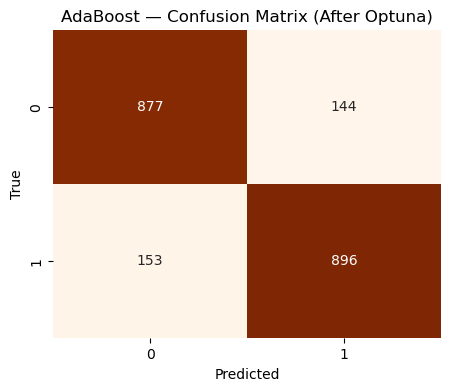

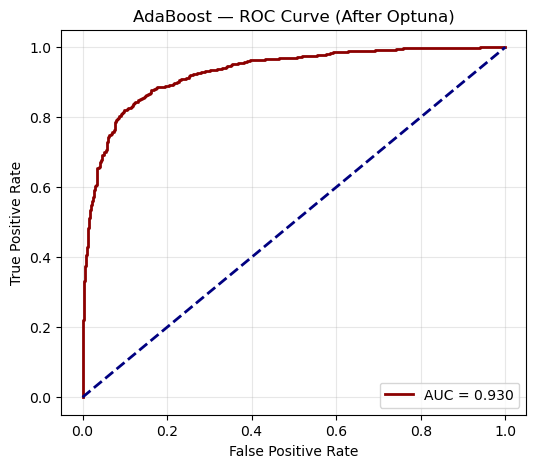

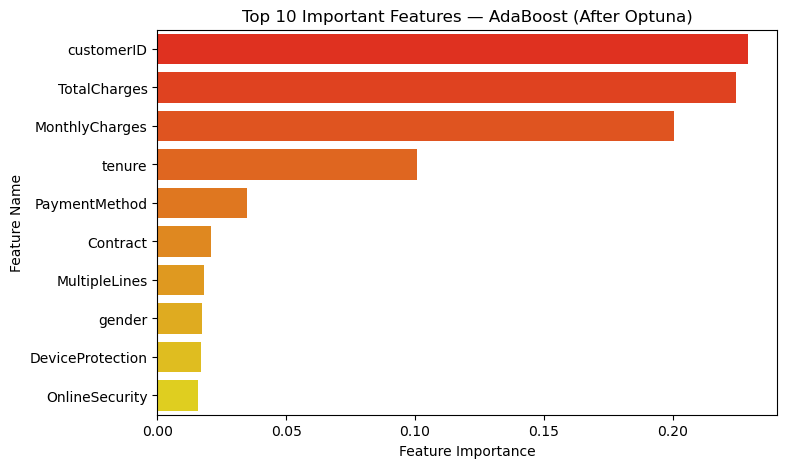

In [16]:
# --------------------------------------------
# 📊 AdaBoost Evaluation & Visualization
# --------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
)
import pandas as pd
import numpy as np

# ---- Optional: compare before vs after ----
try:
    y_pred_before = ada_model.predict(X_test)  # baseline AdaBoost, if exists
    acc_before = accuracy_score(y_test, y_pred_before)
    f1_before = f1_score(y_test, y_pred_before, average='weighted')
except:
    y_pred_before = None
    acc_before, f1_before = 0, 0  # fallback if baseline unavailable

# ---- After Optuna ----
acc_after = accuracy_score(y_test, y_pred)
f1_after = f1_score(y_test, y_pred, average="weighted")

print(f"\n📊 AdaBoost Evaluation Results")
print(f"Accuracy: {acc_after:.4f}")
print(f"F1 Score: {f1_after:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ---- Confusion Matrix ----
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("AdaBoost — Confusion Matrix (After Optuna)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ---- ROC Curve ----
if hasattr(best_ada, "predict_proba"):
    y_proba = best_ada.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color="darkred", lw=2, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.title("AdaBoost — ROC Curve (After Optuna)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

# ---- Before vs After Optuna Comparison ----
if y_pred_before is not None:
    metrics_df = pd.DataFrame({
        "Metric": ["Accuracy", "F1 Score"],
        "Before Tuning": [acc_before, f1_before],
        "After Tuning": [acc_after, f1_after]
    })

    metrics_df.plot(
        x="Metric",
        kind="bar",
        figsize=(6,4),
        title="AdaBoost — Before vs After Optuna",
        rot=0,
        color=["gray", "orange"]
    )
    plt.legend(["Before", "After"], loc="lower right")
    plt.show()

# ---- Feature Importance (from DecisionTree base estimators) ----
try:
    importances = np.mean([tree.feature_importances_ for tree in best_ada.estimators_ if hasattr(tree, 'feature_importances_')], axis=0)
    feat_names = X_train.columns
    sorted_idx = np.argsort(importances)[::-1]

    plt.figure(figsize=(8,5))
    sns.barplot(x=importances[sorted_idx][:10], y=feat_names[sorted_idx][:10], palette="autumn")
    plt.title("Top 10 Important Features — AdaBoost (After Optuna)")
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Name")
    plt.show()
except Exception as e:
    print(f"⚠️ Feature importance not available: {e}")


<a id = "107" ></a>
#### **Gradient Boosting Classifier**
<a id = "gb" ></a>

In [17]:
import optuna
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import time

print("✅ Starting Gradient Boosting Optimization...")

# stable validation split
X_tune, X_hold, y_tune, y_hold = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

def objective(trial):
    # Sample hyperparameters
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        "subsample": trial.suggest_float("subsample", 0.7, 1.0),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    }

    gb = GradientBoostingClassifier(**params, random_state=42)

    # Cross-validated performance (combined metric)
    f1 = cross_val_score(gb, X_tune, y_tune, scoring="f1_weighted", cv=3, n_jobs=-1, error_score="raise").mean()
    acc = cross_val_score(gb, X_tune, y_tune, scoring="accuracy", cv=3, n_jobs=-1, error_score="raise").mean()
    return 0.6 * f1 + 0.4 * acc

# Bayesian search
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=25, show_progress_bar=True)

print("\n✅ Best GradientBoosting Hyperparameters:")
print(study.best_params)

# Re-train the final model
best_params = study.best_params
best_gb = GradientBoostingClassifier(**best_params, random_state=42)

start = time.time()
best_gb.fit(X_train, y_train)
print(f"⏱️ Training Time: {time.time() - start:.2f}s")

# Evaluate
y_pred = best_gb.predict(X_test)
print("\n🎯 Final GradientBoosting Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))


[I 2025-11-12 15:09:10,953] A new study created in memory with name: no-name-7d273f14-00ee-4bbd-b721-2251f45a3649


✅ Starting Gradient Boosting Optimization...


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-11-12 15:09:28,537] Trial 0 finished with value: 0.8348831111125283 and parameters: {'n_estimators': 458, 'learning_rate': 0.014045588296082523, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 2, 'subsample': 0.8255529139602852, 'max_features': None}. Best is trial 0 with value: 0.8348831111125283.
[I 2025-11-12 15:09:35,654] Trial 1 finished with value: 0.8403778183246622 and parameters: {'n_estimators': 205, 'learning_rate': 0.09615690593406057, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 3, 'subsample': 0.733043892239382, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.8403778183246622.
[I 2025-11-12 15:09:42,970] Trial 2 finished with value: 0.8418884621098717 and parameters: {'n_estimators': 206, 'learning_rate': 0.0682150422047822, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 1, 'subsample': 0.754846766082695, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.8418884621098717.
[I 2025-11-12 15:10:20,412] Trial 3 finis


📊 Gradient Boosting Evaluation Results
Accuracy: 0.8565
F1 Score: 0.8565

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1021
           1       0.86      0.86      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



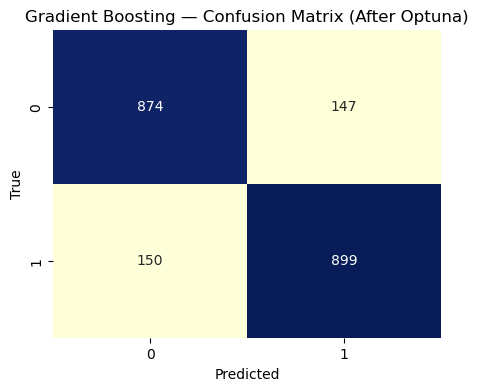

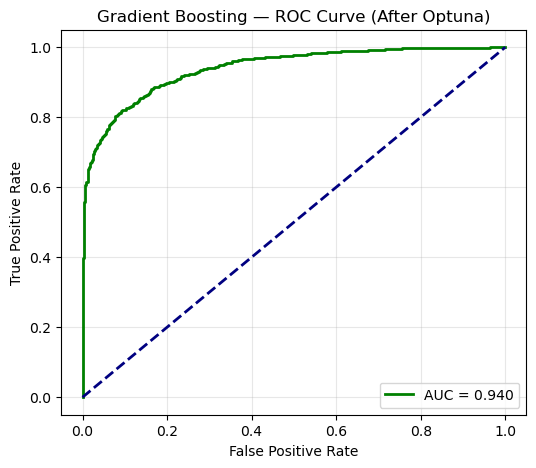

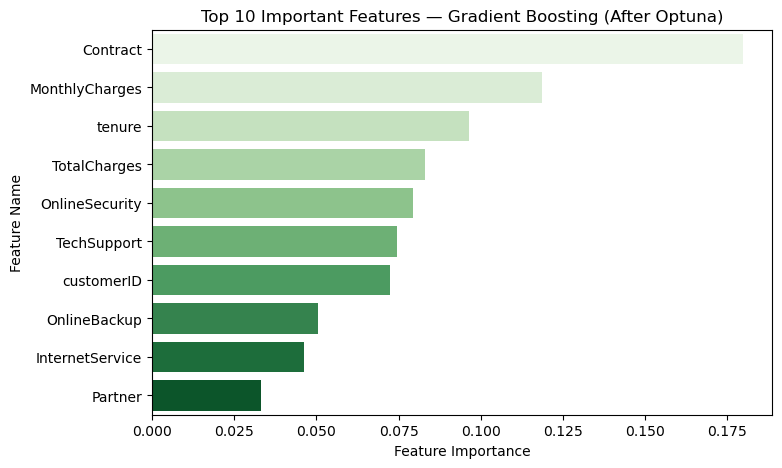

In [18]:
# --------------------------------------------
# 📊 Gradient Boosting Evaluation & Visualization
# --------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc
)
import pandas as pd
import numpy as np

# ---- Optional: baseline comparison ----
try:
    y_pred_before = gb_model.predict(X_test)  # your previous non-tuned GB model
    acc_before = accuracy_score(y_test, y_pred_before)
    f1_before = f1_score(y_test, y_pred_before, average='weighted')
except:
    y_pred_before = None
    acc_before, f1_before = 0, 0  # skip baseline if not available

# ---- After Optuna ----
acc_after = accuracy_score(y_test, y_pred)
f1_after = f1_score(y_test, y_pred, average="weighted")

print(f"\n📊 Gradient Boosting Evaluation Results")
print(f"Accuracy: {acc_after:.4f}")
print(f"F1 Score: {f1_after:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ---- Confusion Matrix ----
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title("Gradient Boosting — Confusion Matrix (After Optuna)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ---- ROC Curve ----
if hasattr(best_gb, "predict_proba"):
    y_proba = best_gb.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color="green", lw=2, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.title("Gradient Boosting — ROC Curve (After Optuna)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

# ---- Before vs After Comparison ----
if y_pred_before is not None:
    metrics_df = pd.DataFrame({
        "Metric": ["Accuracy", "F1 Score"],
        "Before Tuning": [acc_before, f1_before],
        "After Tuning": [acc_after, f1_after]
    })

    metrics_df.plot(
        x="Metric",
        kind="bar",
        figsize=(6,4),
        title="Gradient Boosting — Before vs After Optuna",
        rot=0,
        color=["gray", "green"]
    )
    plt.legend(["Before", "After"], loc="lower right")
    plt.show()

# ---- Feature Importance ----
importances = best_gb.feature_importances_
feat_names = X_train.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
sns.barplot(x=importances[sorted_idx][:10], y=feat_names[sorted_idx][:10], palette="Greens")
plt.title("Top 10 Important Features — Gradient Boosting (After Optuna)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.show()


<a id = "108" ></a>
#### **Voting Classifier**
<a id = "vc" ></a>
Let's now predict the final model based on the highest majority of voting and check it's score.

In [23]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


eclf1 = VotingClassifier(
    estimators=[
        ('gb', best_gb),
        ('ada', best_ada),
        ('rf', best_rf)
    ],
    voting='soft'  
)

eclf1.fit(X_train, y_train)

predictions = eclf1.predict(X_test)


print("\nFinal Voting Ensemble (GB + Ada + RF)")
print(f"Accuracy: {accuracy_score(y_test, predictions):.4f}")
print(f"F1 Score: {f1_score(y_test, predictions, average='weighted'):.4f}")
print("\nClassification Report:\n", classification_report(y_test, predictions))


🎯 Final Voting Ensemble (GB + Ada + RF)
Accuracy: 0.8623
F1 Score: 0.8623

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1021
           1       0.86      0.87      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



🔁 Training Weighted Hybrid Voting Ensemble...

🏁 Weighted Hybrid Voting Ensemble (GB + Ada + RF + MLP)
Accuracy: 0.8638
F1 Score: 0.8637

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1021
           1       0.86      0.88      0.87      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



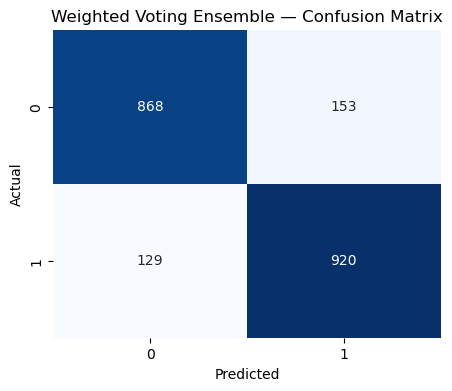

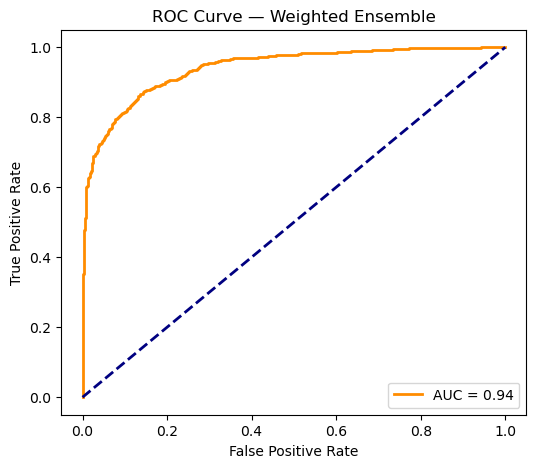

In [47]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Weighted Voting — give more trust to top performers
mlp_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(
        hidden_layer_sizes=(128, 64, 32),
        activation='relu',
        solver='adam',
        alpha=1e-5,
        learning_rate_init=0.0005,
        max_iter=700,
        random_state=42,
        early_stopping=True,
        n_iter_no_change=20,
        verbose=False
    ))
])

# Adjust weights: RF strongest, then GB, Ada, MLP weakest
eclf_weighted = VotingClassifier(
    estimators=[
        ('gb', best_gb),
        ('ada', best_ada),
        ('rf', best_rf),
        ('mlp', mlp_clf)
    ],
    voting='soft',
    weights=[1.2, 1.0, 1.5, 0.8],  # bias stronger learners
    n_jobs=-1
)

print("🔁 Training Weighted Hybrid Voting Ensemble...")
eclf_weighted.fit(X_train, y_train)

predictions = eclf_weighted.predict(X_test)
probabilities = eclf_weighted.predict_proba(X_test)[:, 1] if len(eclf_weighted.classes_) == 2 else None

# Metrics
acc = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='weighted')

print("\n🏁 Weighted Hybrid Voting Ensemble (GB + Ada + RF + MLP)")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, predictions))

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Weighted Voting Ensemble — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
if probabilities is not None:
    fpr, tpr, _ = roc_curve(y_test, probabilities)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve — Weighted Ensemble')
    plt.legend(loc='lower right')
    plt.show()



🎯 Final Voting Ensemble (GB + Ada + RF)
Accuracy: 0.8623
F1 Score: 0.8623

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1021
           1       0.86      0.87      0.86      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



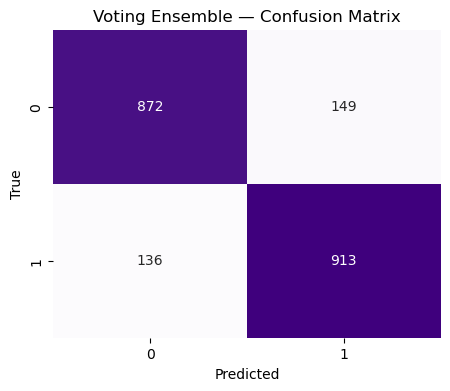

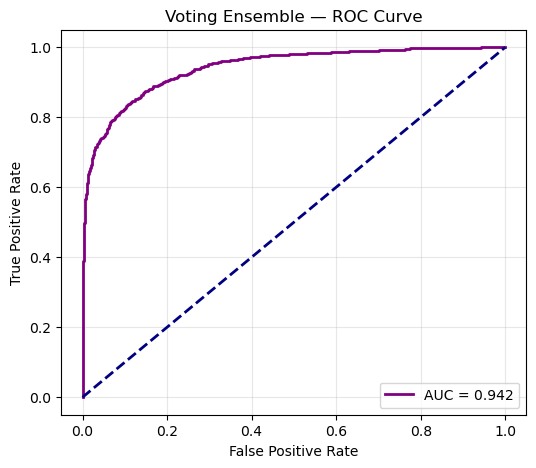

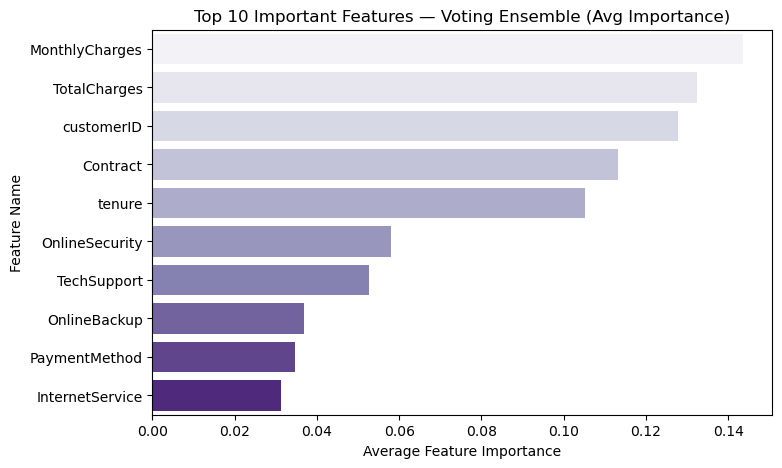

In [21]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("Voting Ensemble — Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 📈 ROC Curve

if hasattr(eclf1, "predict_proba"):
    y_proba = eclf1.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color="purple", lw=2, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.title("Voting Ensemble — ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()


# 🌿 Feature Importance (Averaged across ensemble models)

try:
    feature_importances = []
    for name, model in eclf1.named_estimators_.items():
        if hasattr(model, "feature_importances_"):
            feature_importances.append(model.feature_importances_)

    avg_importance = np.mean(feature_importances, axis=0)
    feature_names = X_train.columns
    sorted_idx = np.argsort(avg_importance)[::-1]

    plt.figure(figsize=(8,5))
    sns.barplot(
        x=avg_importance[sorted_idx][:10],
        y=feature_names[sorted_idx][:10],
        palette="Purples"
    )
    plt.title("Top 10 Important Features — Voting Ensemble (Avg Importance)")
    plt.xlabel("Average Feature Importance")
    plt.ylabel("Feature Name")
    plt.show()

except Exception as e:
    print(f"⚠️ Some base models lack feature_importances_: {e}")


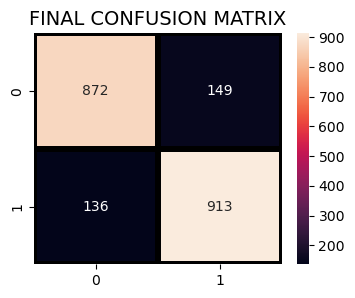

In [22]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

In [25]:
import joblib


joblib.dump(best_rf, "best_model.pkl")

print("✅ Model saved as best_model.pkl")


✅ Model saved as best_model.pkl
